# Load data

In [1]:
from pandas import DataFrame, read_csv

def load_data(
        data_file: str,
        n_rows: int | None = None,
) -> DataFrame:
    return read_csv(data_file, index_col='row_index', nrows=n_rows)

In [2]:
import pandas as pd

#train_data = file_manager.load_training_data()

# TODO
train_file = 'X_train.csv'
test_file = 'X_test.csv'
n_rows = 100_000

test_data = load_data(test_file)
tiny_train_data = load_data(train_file, n_rows=n_rows)

# Split raw data by variable category (piezo, weather, ...)

We are only interested in training data.

In [3]:
from pandas import DataFrame

# Function to extract variable category
def extract_category(
        df: DataFrame,
        category: str,
) -> DataFrame:
    return df[df.columns[df.columns.str.startswith(category)]]

In [4]:
tiny_train_data.isna().sum(axis=0)

piezo_station_department_code           0
piezo_station_update_date               0
piezo_station_investigation_depth    6114
piezo_station_department_name           0
piezo_station_commune_code_insee        0
                                     ... 
insee_pop_commune                     970
insee_med_living_level                970
insee_%_ind                           970
insee_%_const                         970
piezo_groundwater_level_category        0
Length: 135, dtype: int64

In [5]:
missing_columns = tiny_train_data.columns[tiny_train_data.isna().sum(axis=0) > 0]
print(missing_columns.tolist())

['piezo_station_investigation_depth', 'piezo_station_pe_label', 'piezo_station_bdlisa_codes', 'piezo_producer_code', 'piezo_producer_name', 'piezo_measure_nature_code', 'piezo_measure_nature_name', 'meteo_rain_height', 'meteo_DRR', 'meteo_temperature_min', 'meteo_time_tn', 'meteo_temperature_max', 'meteo_time_tx', 'meteo_temperature_avg', 'meteo_temperature_avg_threshold', 'meteo_temperature_min_ground', 'meteo_temperature_min_50cm', 'meteo_frost_duration', 'meteo_amplitude_tn_tx', 'meteo_temperature_avg_tntm', 'meteo_pressure_avg', 'meteo_pression_maxi', 'meteo_wind_speed_avg_10m', 'meteo_wind_max', 'meteo_wind_direction_max_inst', 'meteo_time_wind_max', 'meteo_wind_avg', 'meteo_wind_direction_max_avg', 'meteo_time_wind_avg', 'meteo_wind_speed_avg_2m', 'meteo_wind_max_2m', 'meteo_wind_direction_max_inst_2m', 'meteo_time_wind_max_2m', 'meteo_wind_max_3s', 'meteo_time_wind_max_3s', 'meteo_humidity_min', 'meteo_time_humidity_min', 'meteo_humidity_max', 'meteo_time_humidity_max', 'meteo_h

In [6]:
# listing all numerical values except price to have only the features
numerical_columns = tiny_train_data.dtypes[((tiny_train_data.dtypes=="float64")|(tiny_train_data.dtypes=="int64"))].index.tolist()

C:\Users\serra\AppData\Local\Temp\ipykernel_15184\1841192603.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tiny_train_data, x=column, fill=True)
C:\Users\serra\AppData\Local\Temp\ipykernel_15184\1841192603.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tiny_train_data, x=column, fill=True)
C:\Users\serra\AppData\Local\Temp\ipykernel_15184\1841192603.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=tiny_train_data, x=column, fill=True)


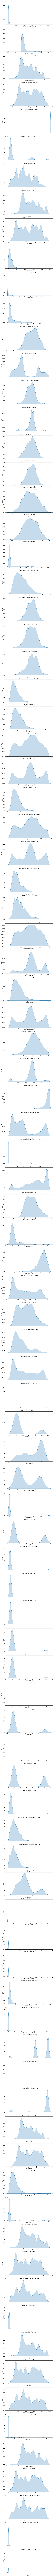

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, len(numerical_columns) * 5))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.kdeplot(data=tiny_train_data, x=column, fill=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

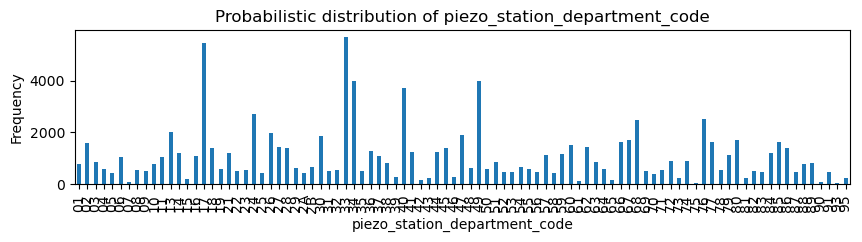

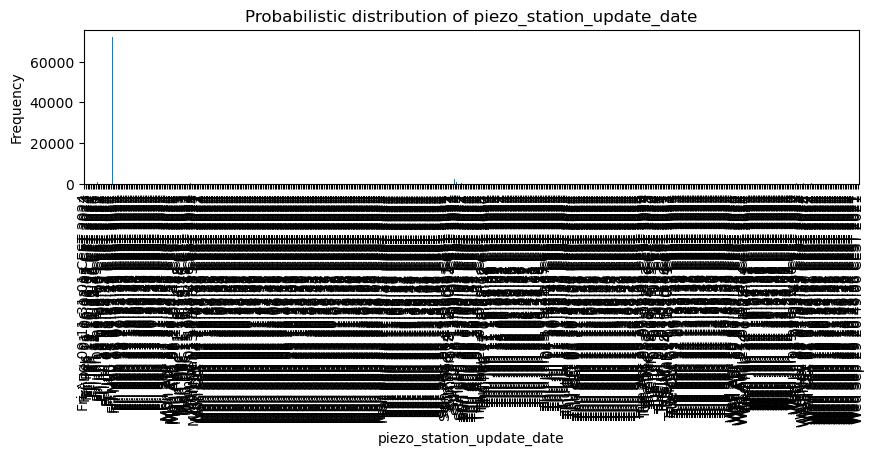

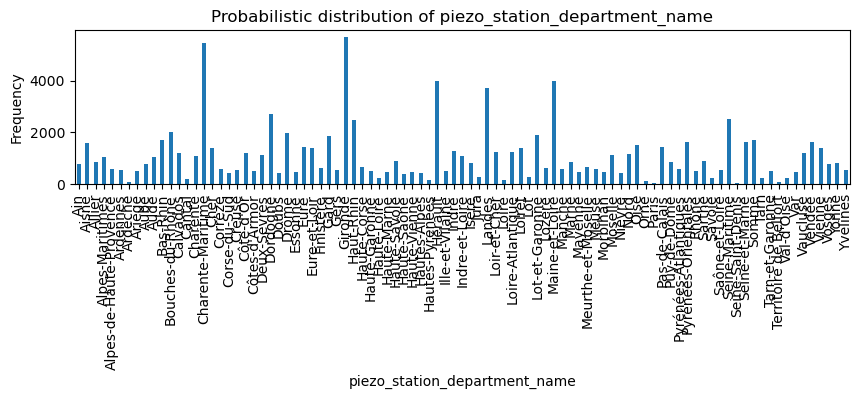

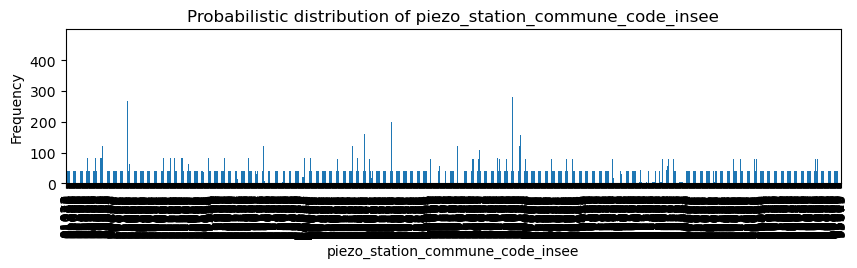

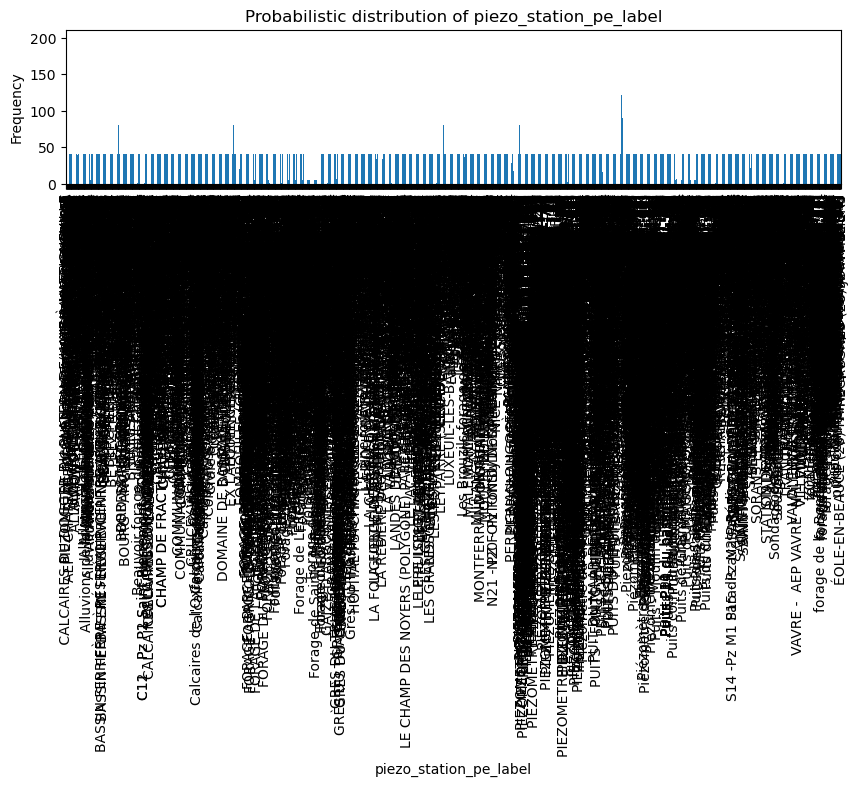

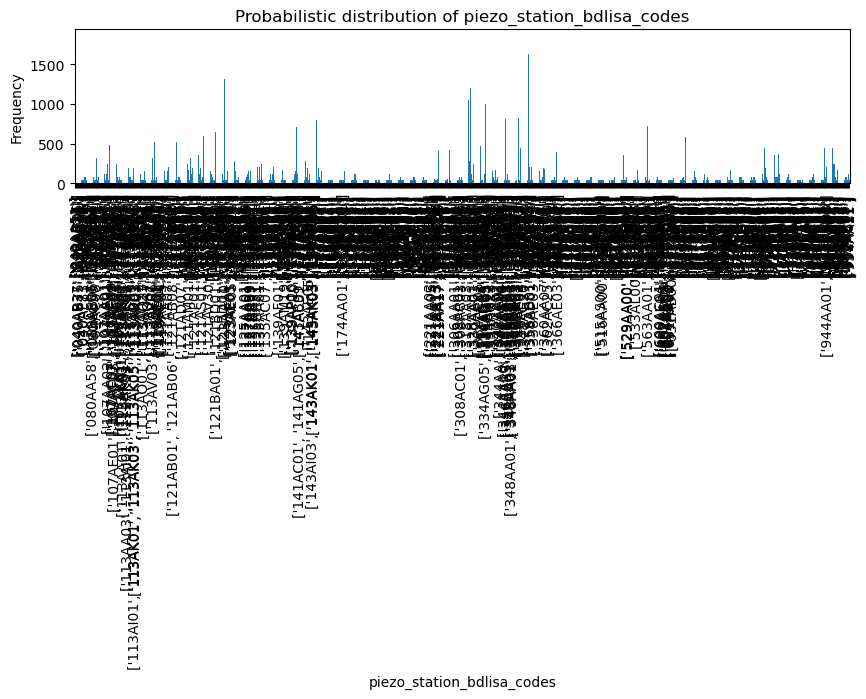

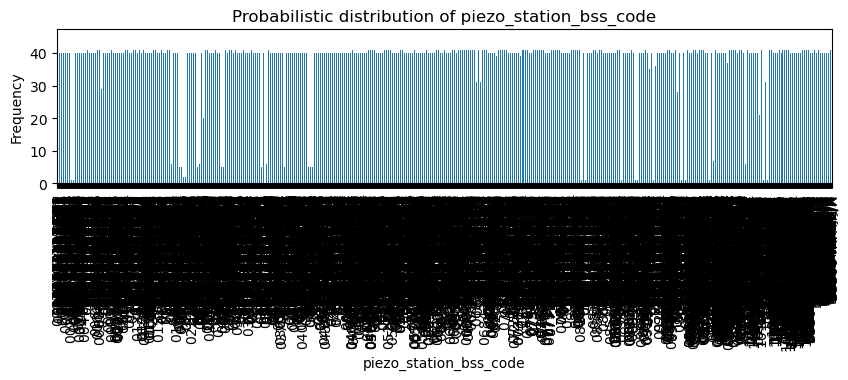

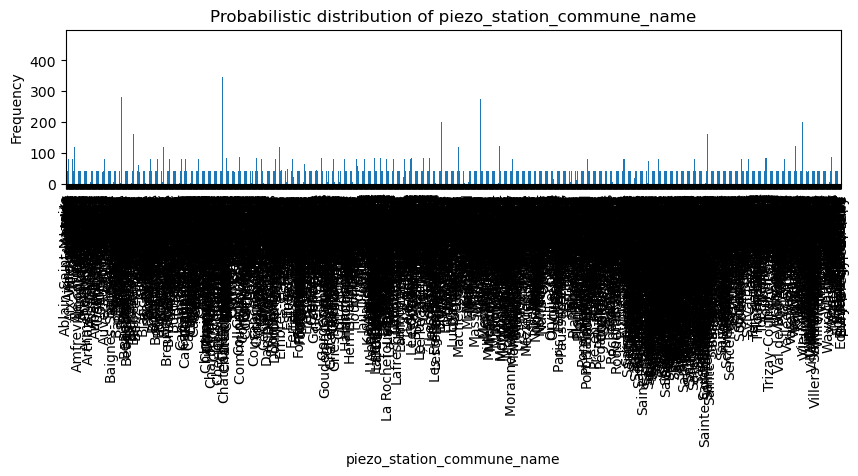

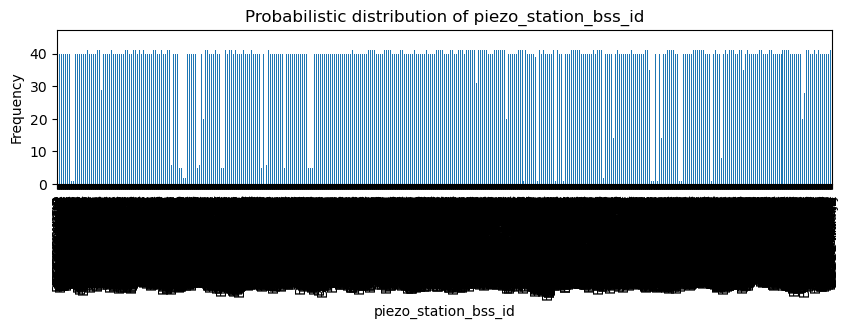

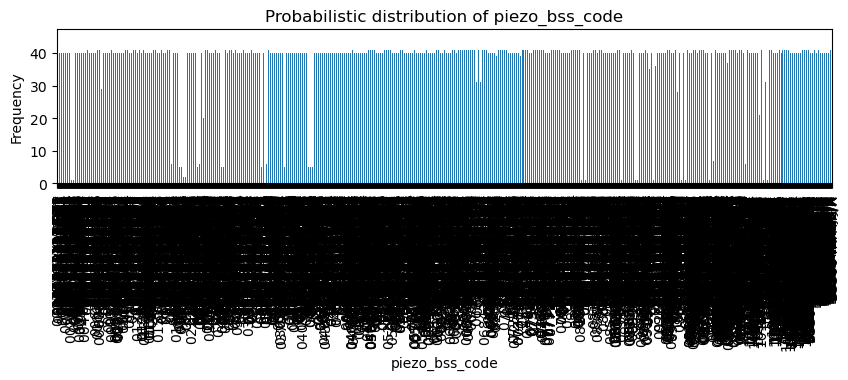

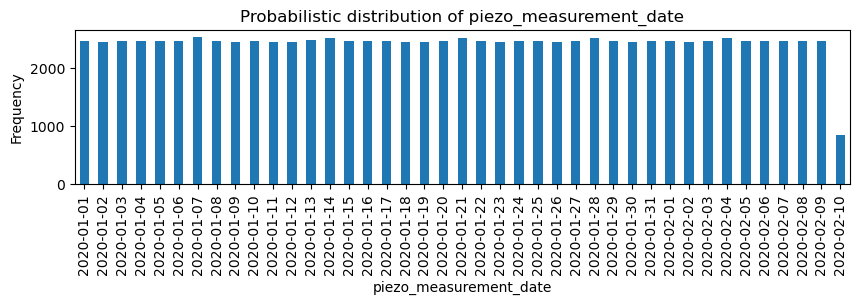

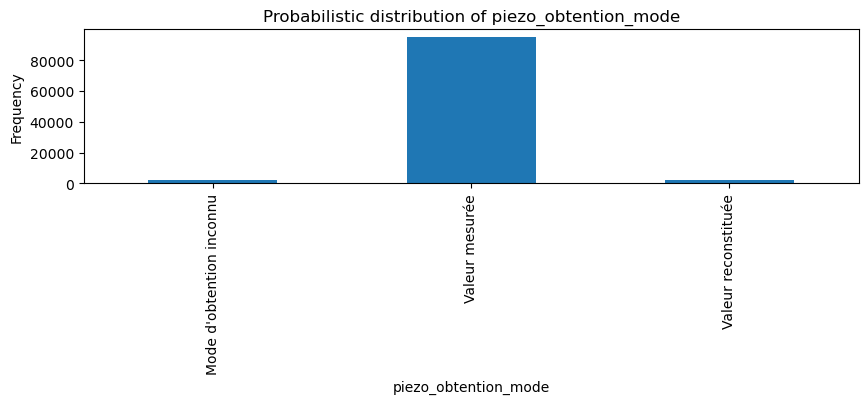

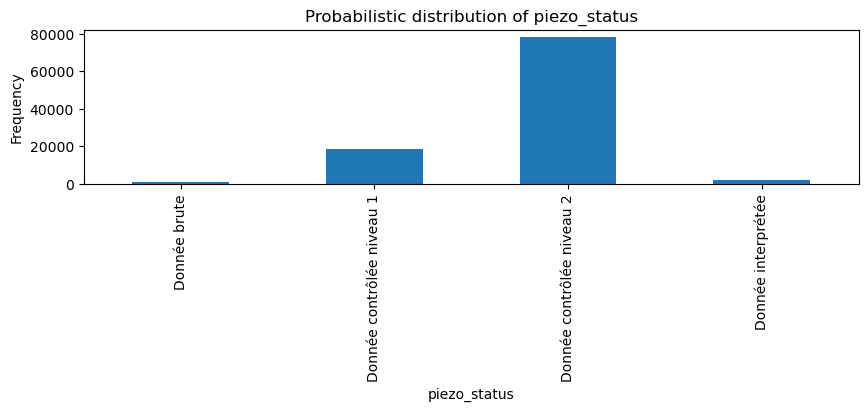

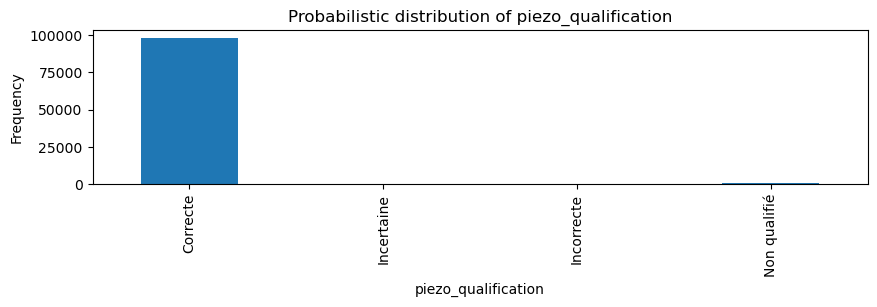

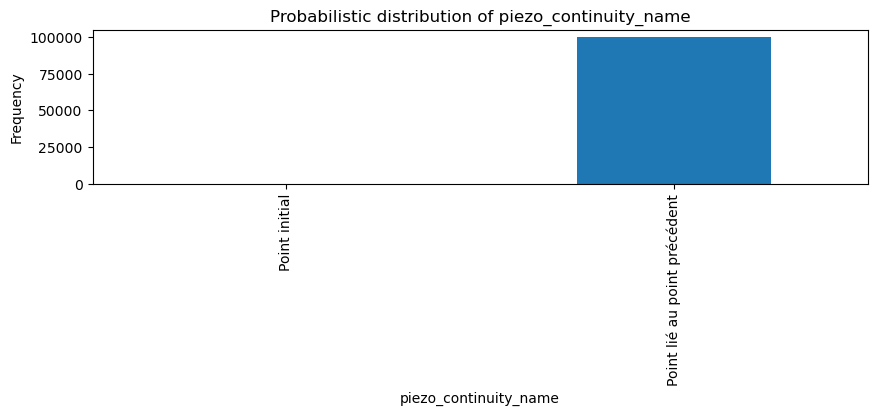

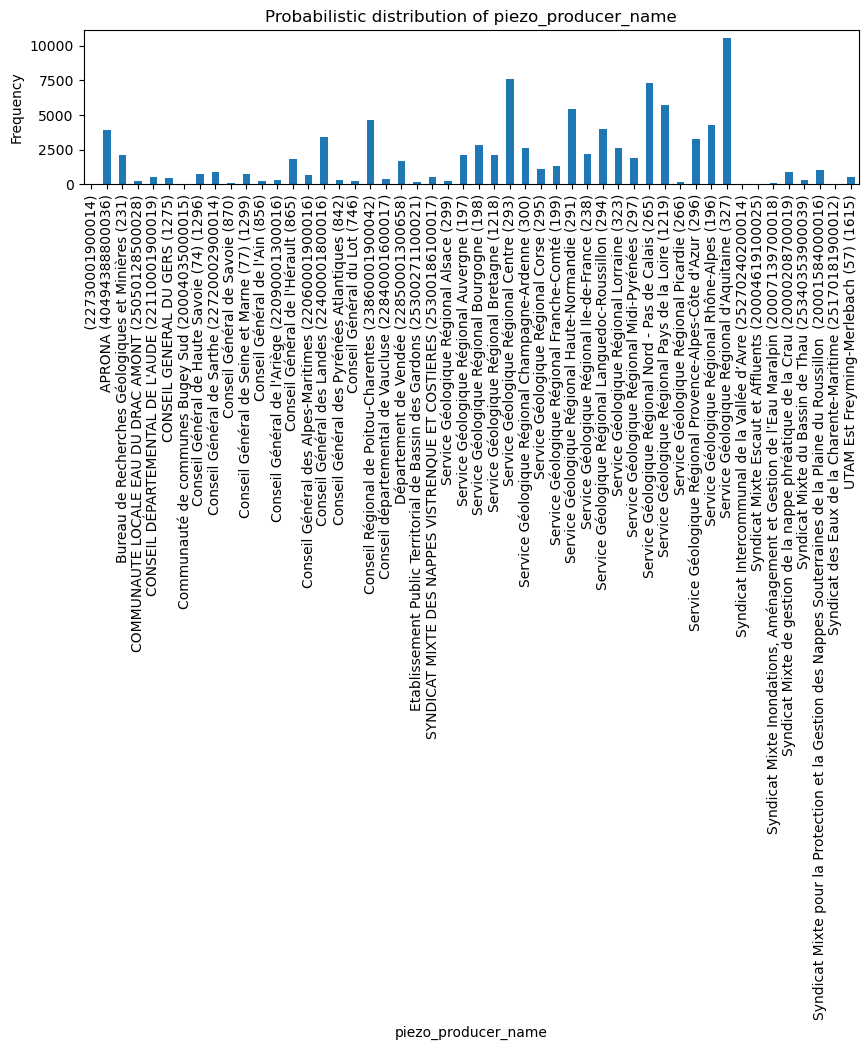

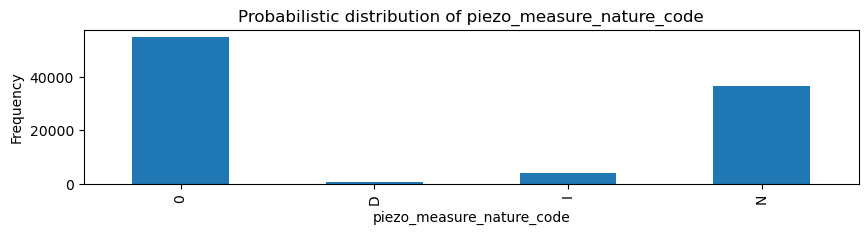

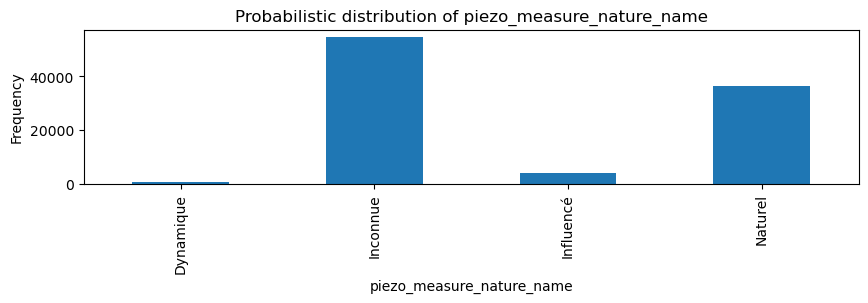

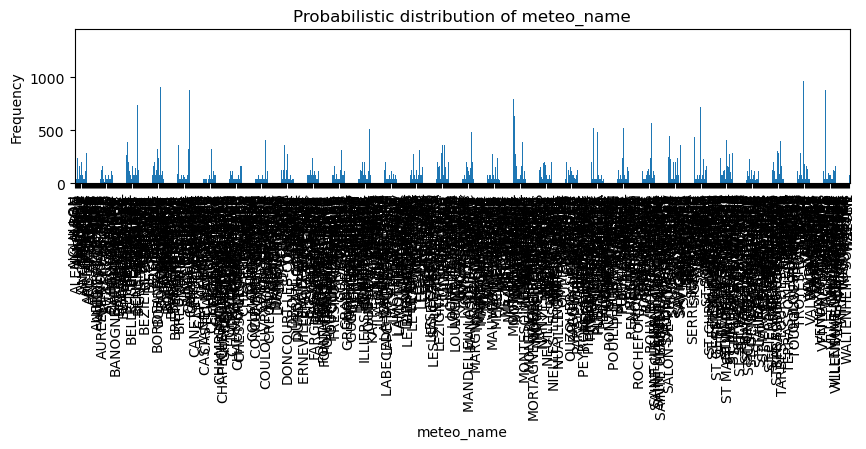

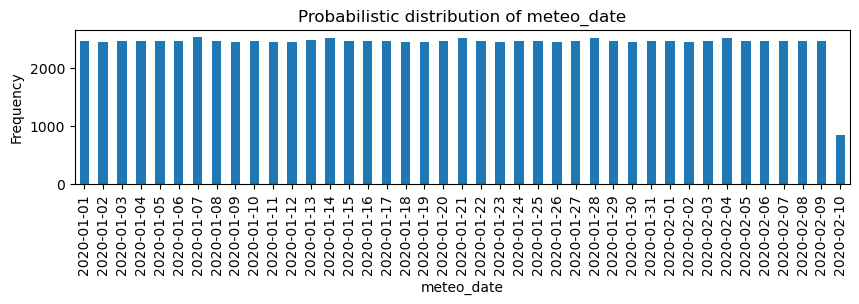

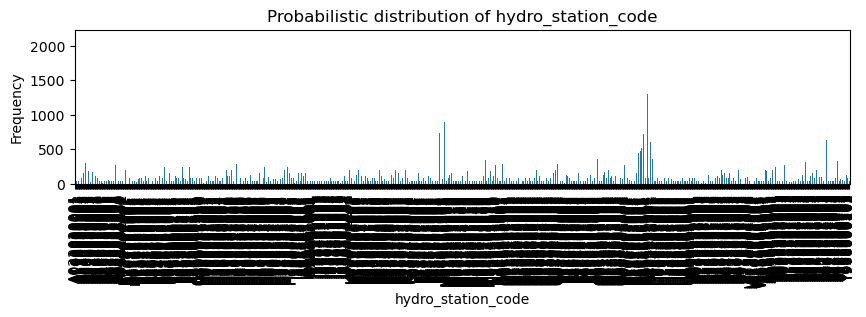

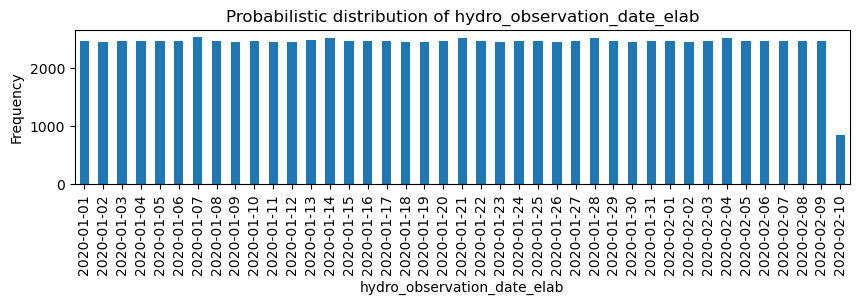

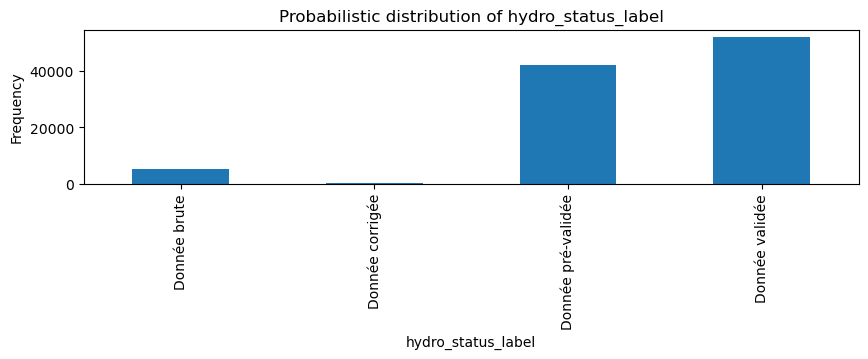

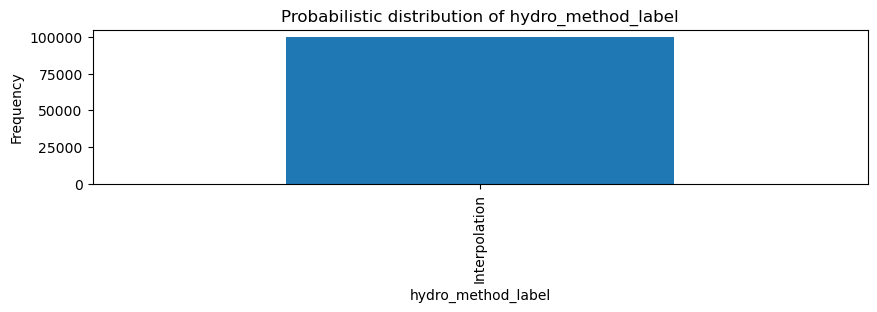

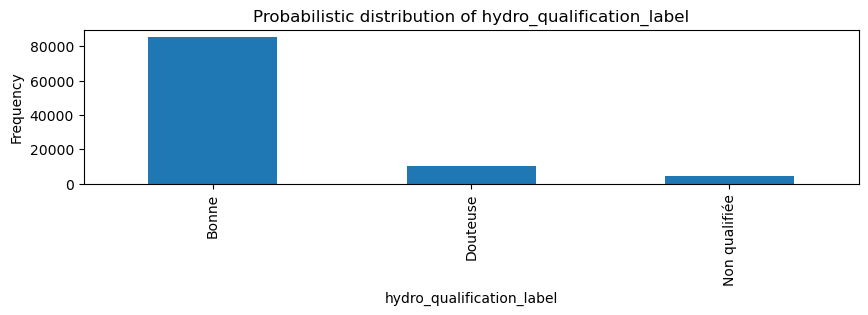

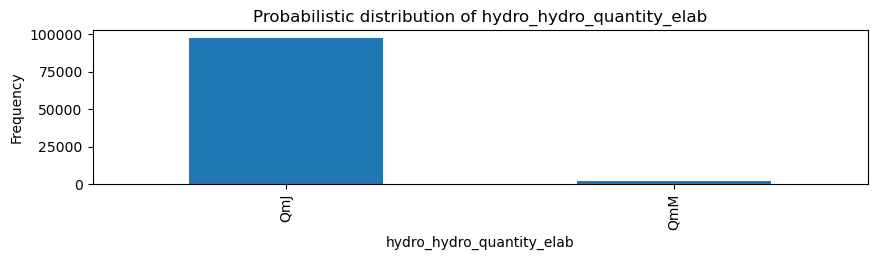

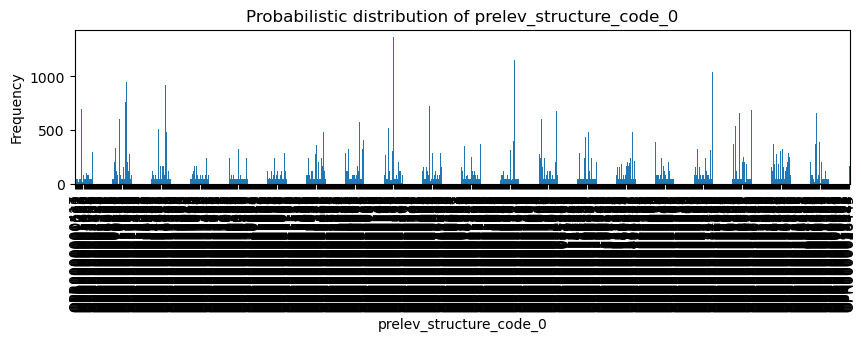

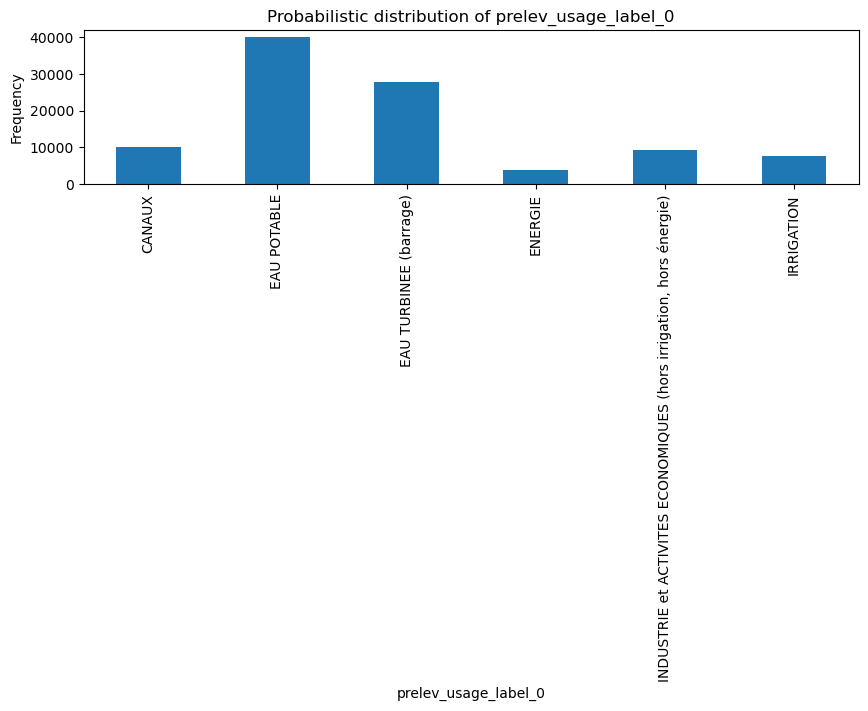

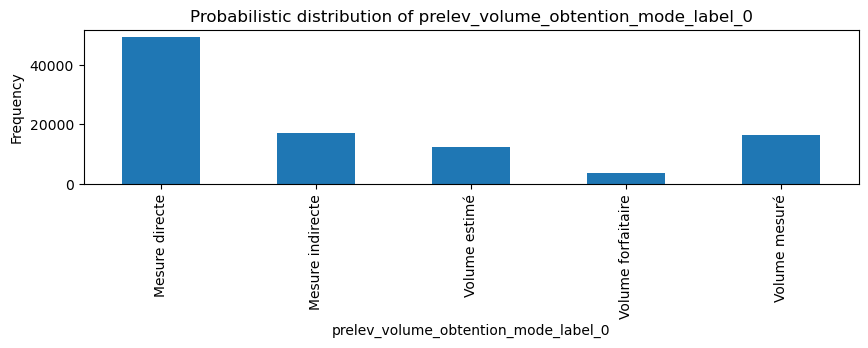

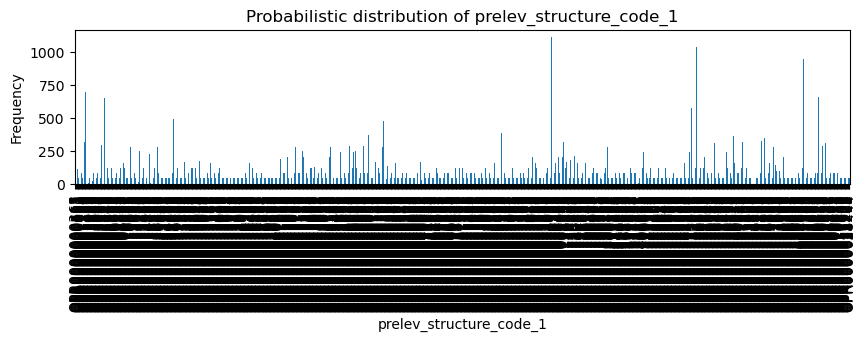

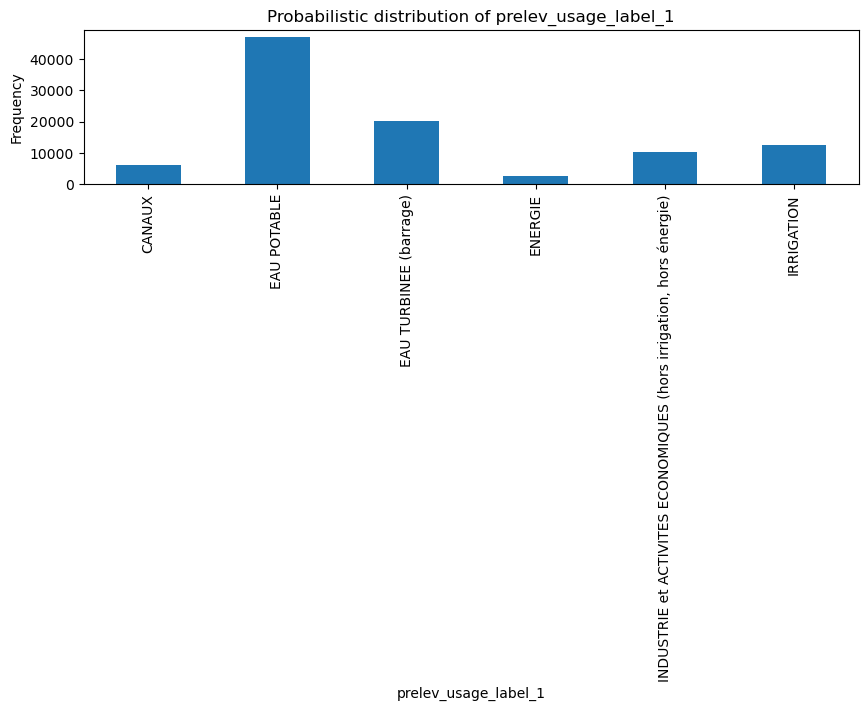

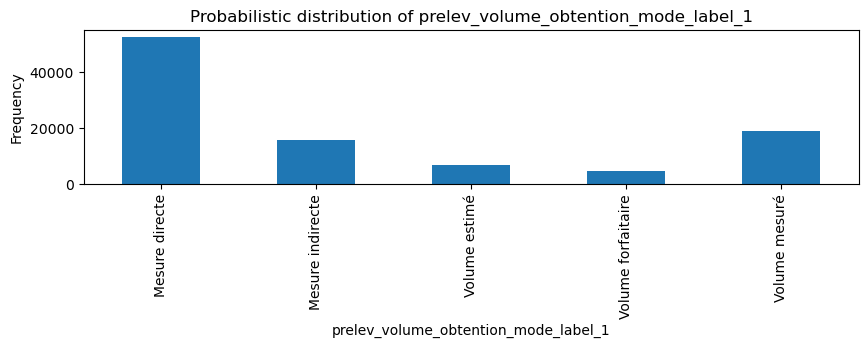

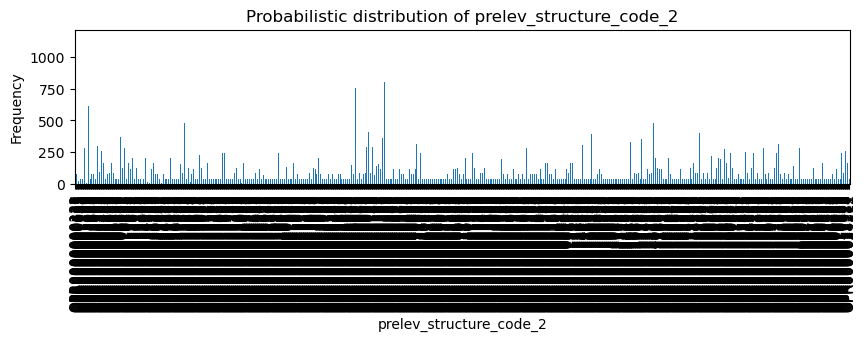

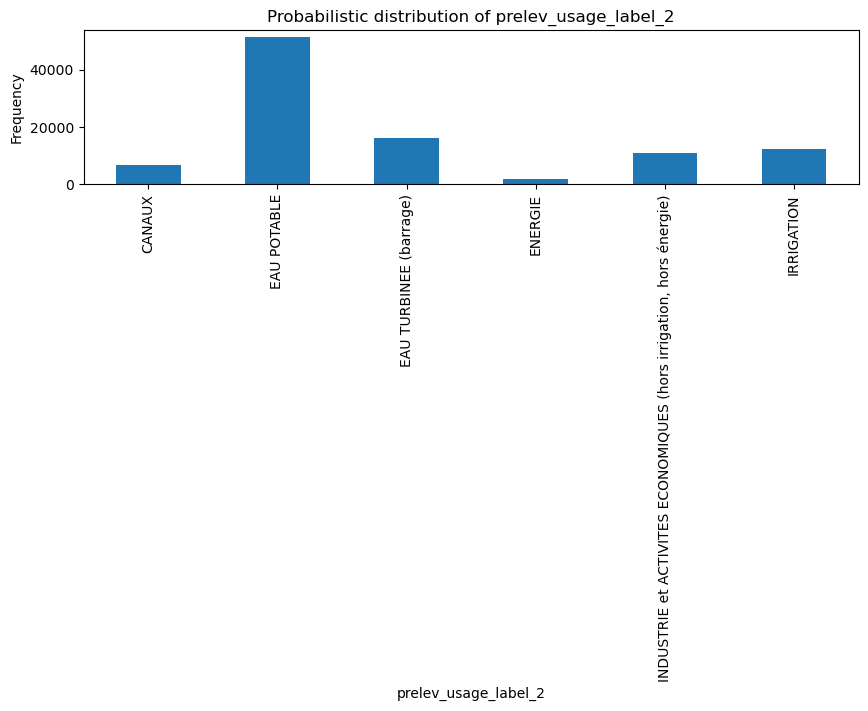

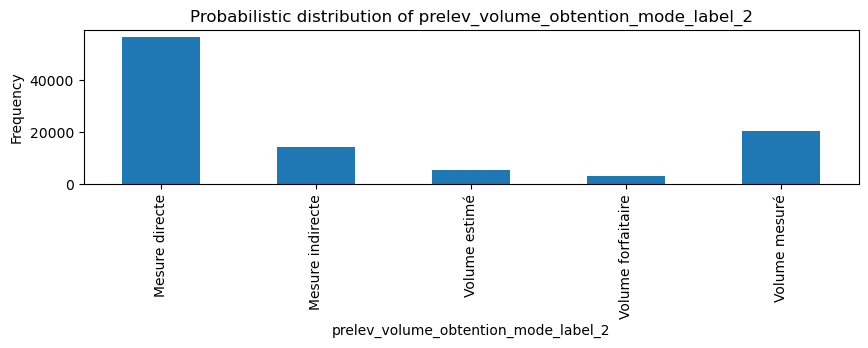

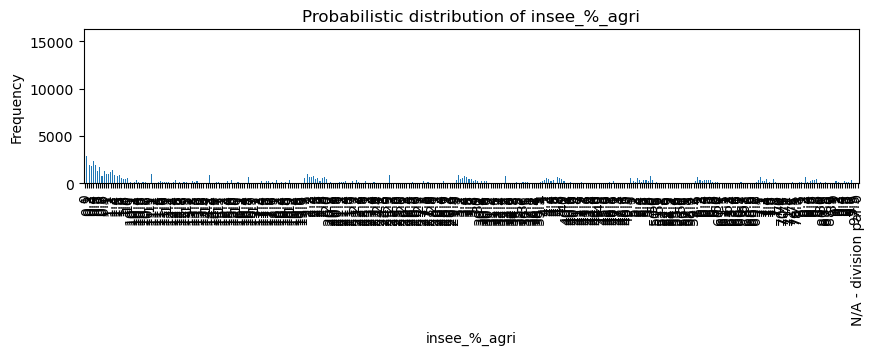

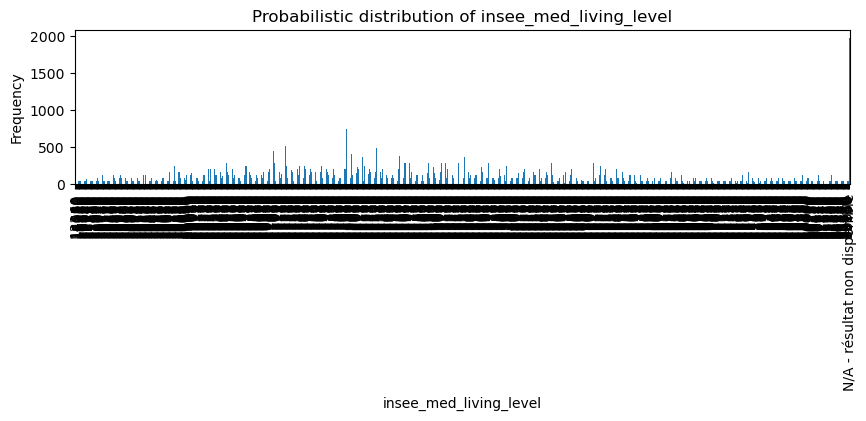

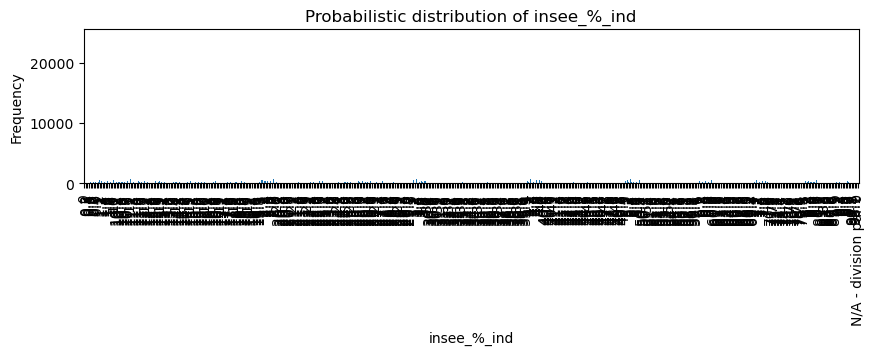

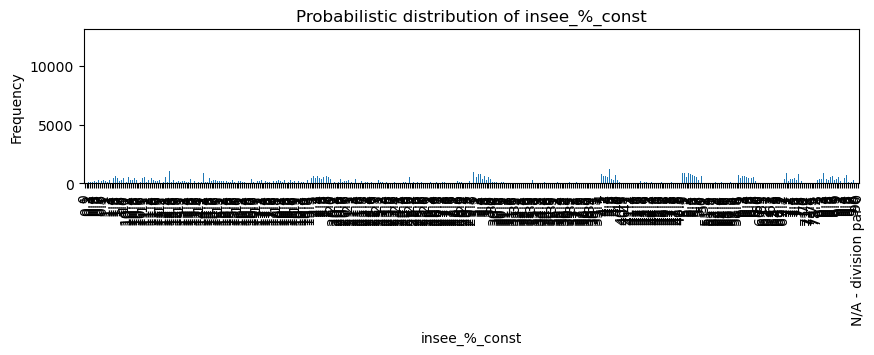

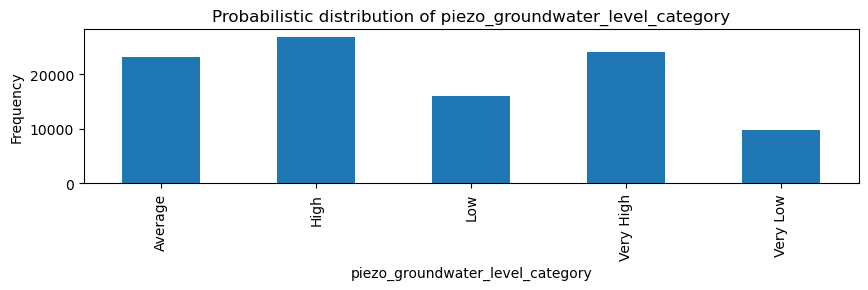

In [8]:
# listing all categorical variables
# categorical_columns = df.dtypes[((df.dtypes!="float64")&(df.dtypes!="int64"))].index.tolist()
categorical_columns = tiny_train_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    # choosing a size for each bar plot
    plt.figure(figsize=(10,2))
    
    # creating bar plots for each feature
    tiny_train_data[column].value_counts().sort_index().plot(kind='bar')
    
    # choosing appropriate names for titles and x and y axises
    plt.title(f'Probabilistic distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    # displaying bar plots
    plt.show()

In [9]:
columns_to_display = [
    "meteo_if_snow_ground",
    "meteo_if_smoke",
    "meteo_snow_height",
    "hydro_method_code",
    "hydro_method_label"
]

# Display the first 20 values for each column
tiny_train_data[columns_to_display].head(10)
tiny_train_data[columns_to_display].isna().sum()


meteo_if_snow_ground    96739
meteo_if_smoke          87479
meteo_snow_height       89167
hydro_method_code           0
hydro_method_label          0
dtype: int64